In [22]:
ls


house_price.csv  house_price.ipynb


# Imporitng Libraries 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load Data

In [24]:
df = pd.read_csv('house_price.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [26]:
df['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [27]:
df['city'].value_counts()

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [28]:
obj_col = df.select_dtypes('object').keys()
obj_col

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [29]:
df = df.drop(columns=obj_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


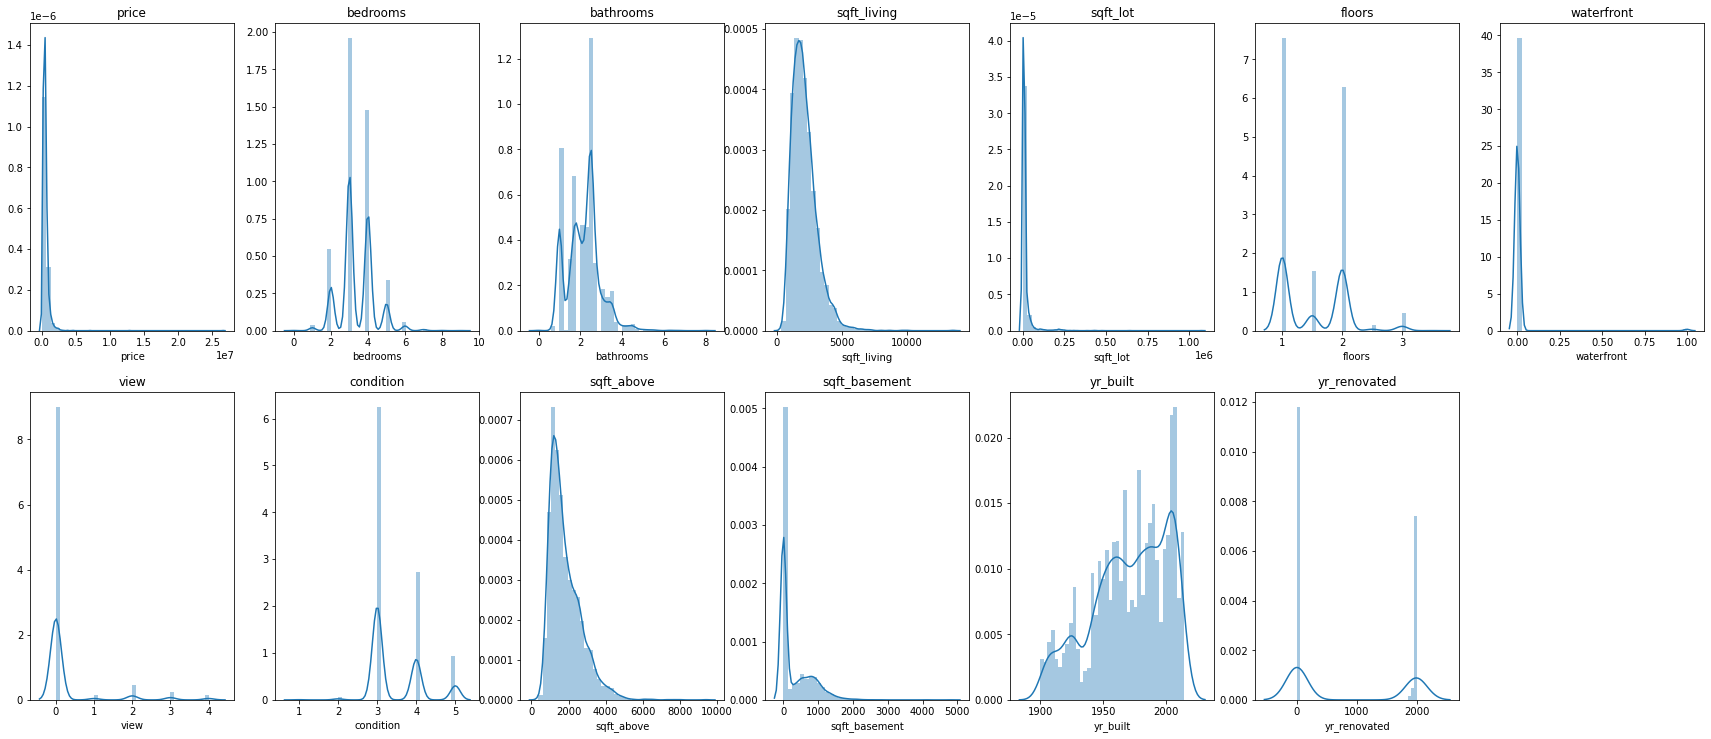

In [30]:
col = df.keys()
col

plt.figure(figsize=(30 , 60))
for i , val  in enumerate(col):
    plt.subplot(9, 7 , i+1)
    plt.title(val)
    sns.distplot(df[str(val)] , bins=40)

    
    

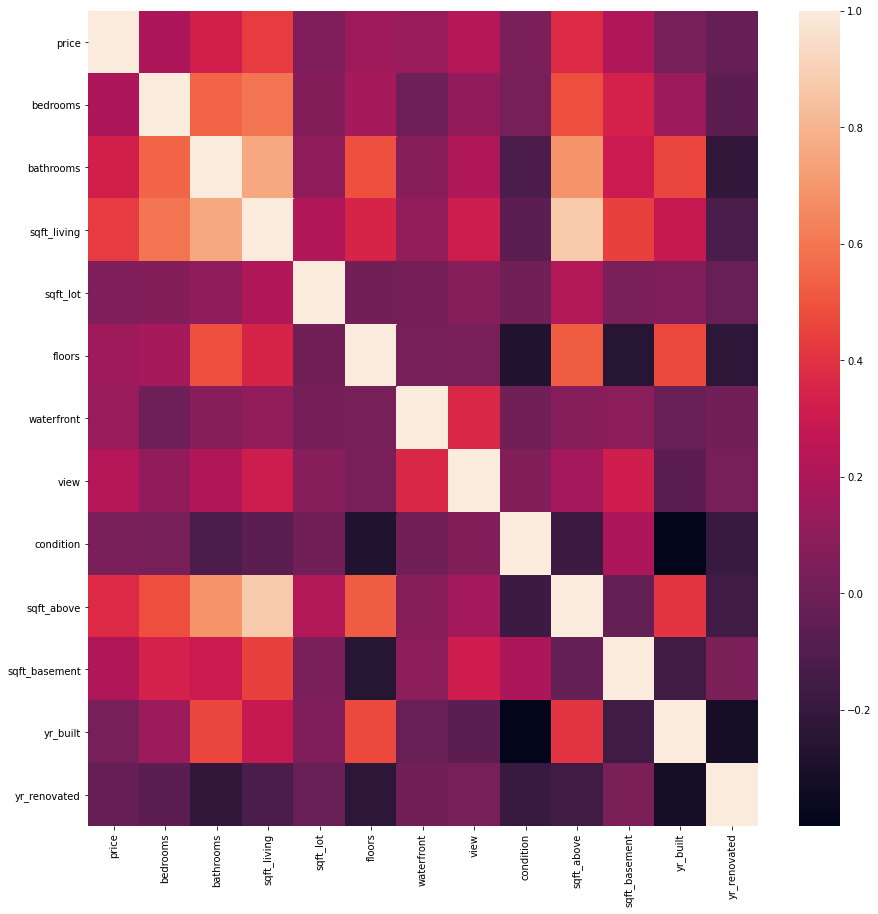

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.show()

In [31]:
df['price'].value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


# Split data

In [33]:
from sklearn.model_selection import train_test_split

Y = df['price'].values
print(Y)
df2 = df.drop('price' , axis=1)
X = df2.values
print(X)
x_train , x_test , y_train  , y_test = train_test_split(X , Y , test_size= 0.25)

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]
[[3.000e+00 1.500e+00 1.340e+03 ... 0.000e+00 1.955e+03 2.005e+03]
 [5.000e+00 2.500e+00 3.650e+03 ... 2.800e+02 1.921e+03 0.000e+00]
 [3.000e+00 2.000e+00 1.930e+03 ... 0.000e+00 1.966e+03 0.000e+00]
 ...
 [3.000e+00 2.500e+00 3.010e+03 ... 0.000e+00 2.009e+03 0.000e+00]
 [4.000e+00 2.000e+00 2.090e+03 ... 1.020e+03 1.974e+03 0.000e+00]
 [3.000e+00 2.500e+00 1.490e+03 ... 0.000e+00 1.990e+03 0.000e+00]]


In [34]:
print(x_train)

[[3.000e+00 1.750e+00 1.670e+03 ... 5.000e+02 1.978e+03 0.000e+00]
 [4.000e+00 1.750e+00 2.250e+03 ... 1.000e+02 1.940e+03 2.001e+03]
 [3.000e+00 2.500e+00 1.870e+03 ... 4.000e+02 1.980e+03 0.000e+00]
 ...
 [3.000e+00 2.250e+00 9.980e+02 ... 2.000e+02 2.007e+03 0.000e+00]
 [4.000e+00 3.250e+00 2.400e+03 ... 0.000e+00 1.982e+03 2.011e+03]
 [4.000e+00 2.750e+00 3.030e+03 ... 0.000e+00 2.011e+03 0.000e+00]]


In [35]:
print(y_train)

[239950. 350000. 455000. ... 324000. 585000. 525000.]


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit(x_train)
x_train  = sc_train.transform(x_train)
x_test = sc_train.transform(x_test)

In [37]:
print(x_train)

[[-0.43145567 -0.52305969 -0.48569042 ...  0.40846875  0.2526341
  -0.83578397]
 [ 0.66789592 -0.52305969  0.11427534 ... -0.45406292 -1.01980552
   1.20312016]
 [-0.43145567  0.42703995 -0.27880568 ...  0.19283583  0.31960461
  -0.83578397]
 ...
 [-0.43145567  0.11034007 -1.18082317 ... -0.23843     1.22370645
  -0.83578397]
 [ 0.66789592  1.3771396   0.2694389  ... -0.66969584  0.38657512
   1.21330959]
 [ 0.66789592  0.74373983  0.92112584 ... -0.66969584  1.35764746
  -0.83578397]]


In [38]:
print(x_test)

[[-1.53080725 -0.52305969  0.30047161 ... -0.66969584 -0.65146774
   1.19598757]
 [ 0.66789592  0.42703995  0.16599652 ... -0.66969584  0.65445714
   1.2112717 ]
 [ 0.66789592 -0.20635981 -0.57878856 ... -0.66969584 -2.15830414
  -0.83578397]
 ...
 [-0.43145567 -0.83975957 -0.9511811  ... -0.66969584  0.08520784
   1.21534747]
 [-0.43145567  0.42703995  0.01083296 ... -0.66969584  0.72142765
  -0.83578397]
 [-0.43145567 -0.52305969 -0.26846144 ... -0.66969584  0.45354562
  -0.83578397]]


# Model Creation  

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
lr = LinearRegression()
classifier = lr.fit(x_train , y_train)
y_pred = classifier.predict(x_test)
y_pred

array([875091.39517083, 545148.35782748, 521928.40154579, ...,
       246057.84202414, 543874.8572792 , 408347.31150085])